# **API Binance**

* [Documentacion API](https://python-binance.readthedocs.io/en/latest/index.html)
* [ChangeLog GitHub](https://binance-docs.github.io/apidocs/spot/en/#change-log)
* [GitHub](https://github.com/binance-exchange/python-binance)


#### **Crear API**

Lo primero es habilitar el uso de la API desde [Binance.com](https://www.binance.com), para esto sigue los siguientes pasos;

* [How to Create API](https://www.binance.com/en/support/faq/360002502072)

1. Haz click en tu perfil de usuario y presiona la opción de API Management


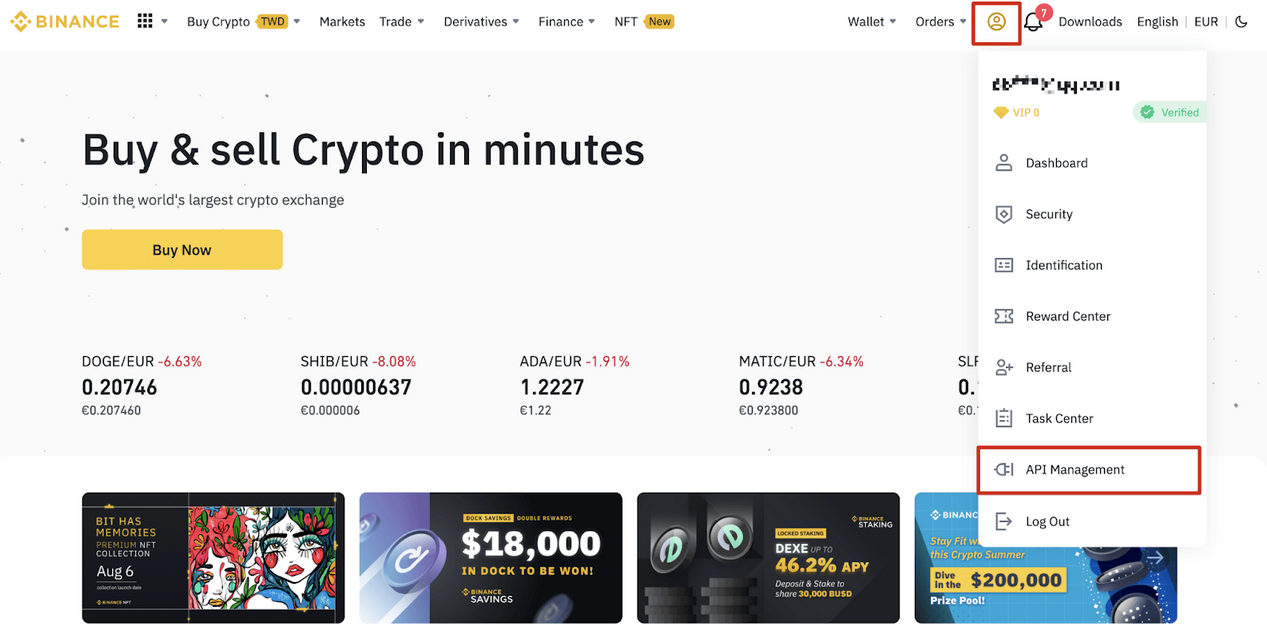

2. Dale un nombre a tu API y presiona crear.

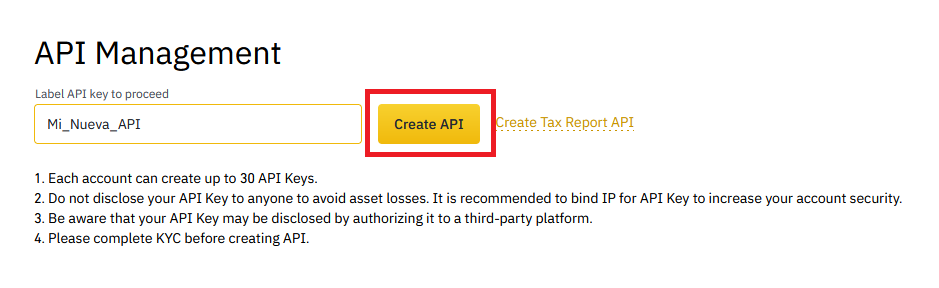


3. Configuración de la API. 
* Almacena las credendiaciales **API key** - **Secret Key**, son necesarias para hacer consultas.
* Recuerda activar la opción de trading si asi lo deseas.
* Para mayor seguridad restringe el acceso a solo tu IP.

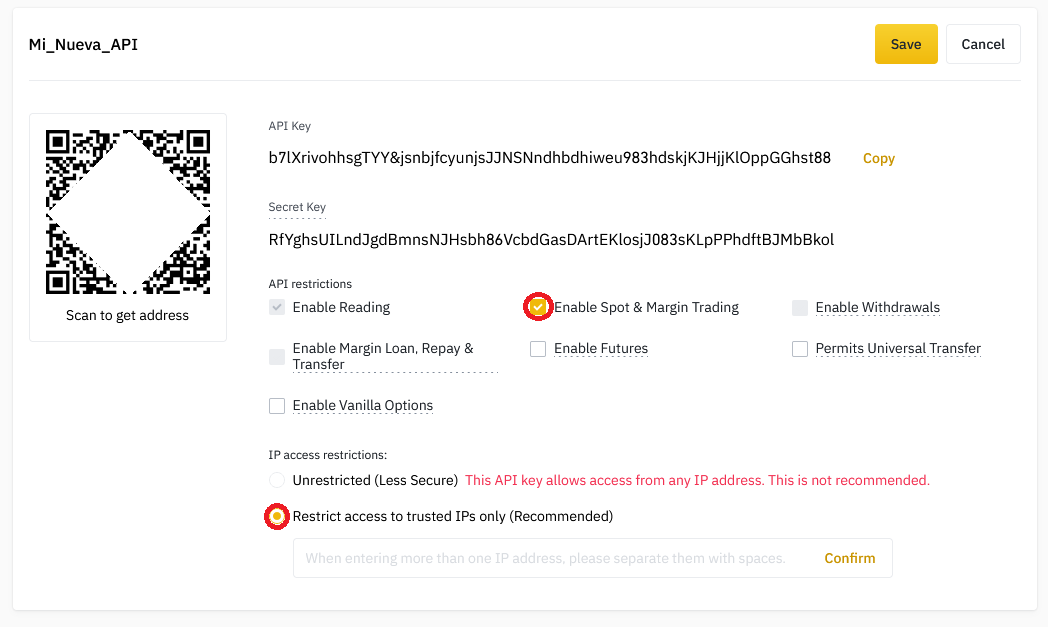

#### **Uso de API**

##### Inicio

In [44]:
#instalamos Librería
!pip install python-binance -q

In [45]:
#Importamos librerías
import os
import math
from datetime import timedelta, datetime

from binance.enums import *
from binance.exceptions import BinanceAPIException, BinanceOrderException
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager

In [46]:
#Credenciales
api_key = 'xxxxx'
api_secret ='xxxxx'

In [47]:
#Inicializar cliente
from binance.client import Client
client = Client(api_key, api_secret)

##### Cuenta

In [ ]:
#Info de la cuenta
info = client.get_account()
print(info)

In [48]:
#Estado de la cuenta
status = client.get_account_status()
status

{'data': 'Normal'}

In [49]:
#Tipo de cuenta
account = info['accountType']
print(account)

SPOT


##### Balances

In [51]:
#Saldo general ordenado
info = client.get_account()

def price(moneda):
  if moneda == 'USDT':
    moneda = 'BUSD'
  price = client.get_symbol_ticker(symbol= moneda+'USDT')
  return price

d={}
#Balance
balance = info['balances']
for asset in balance:
  if float(asset['free'])>0:
    d.update({asset['asset']:asset['free']})

saldos = sorted(d.items(), key=lambda x: x[1], reverse=True)
print('Moneda \t\t\t\t\t Valor USD\n')
for value in saldos:
  v_usdt = price(value[0])
  price_usdt = float(v_usdt['price'])
  conv = round(float(value[1])*price_usdt)
  print('{}: {} \t\t\t  USD ${}'.format(value[0], value[1], conv )) if conv > 0 else None

Moneda 					 Valor USD

USDT: 110.75401322 			  USD $111
ETC: 0.40185227 			  USD $22


In [52]:
#Saldo general

#Info de la cuenta
info = client.get_account()

#Balance
balance = info['balances']
for b in balance:
  if float(b['free'])>0:
    print('{}: {}'.format(b['asset'], b['free']))

BTC: 0.00000036
LTC: 0.00000078
ETH: 0.00000106
QTUM: 0.00056400
EOS: 0.00734000
USDT: 110.75401322
IOTA: 0.00880000
ETC: 0.40185227
DOGE: 0.73600000
BUSD: 0.01278771
KAVA: 0.00966000


In [54]:
#Precio actual
price = client.get_symbol_ticker(symbol='BTCUSDT')
price

{'price': '64088.99000000', 'symbol': 'BTCUSDT'}

In [57]:
#Comisiones
fees = client.get_trade_fee(symbol='BTCUSDT')
fees

[{'makerCommission': '0.001', 'symbol': 'BTCUSDT', 'takerCommission': '0.001'}]

In [55]:
#Lista de Retiros
withdraws = client.get_withdraw_history()
withdraws

[]

In [ ]:
#Lista trades por moneda
trades = client.get_my_trades(symbol='ETCUSDT')
trades

##### Trading



**Compra**

- **symbol** --> Este es el par que deseas tradear ETHUSDT
- **side** --> Buy or Sell, BTCUSDT BUY indica que deseas comprar BTC por USDT, mientras que con SELL venderás BTC por USDT.
- **type** --> Tipo de orden (LIMIT, MARKET, STOP_LOSS, etc)
- **timeInForce** --> Tipo de ejecución GTC,FOK o IOC
- **quantity** --> Cantidad a tradear
- **price** --> Precio


---


**Tipos de ordenes** : 
* LIMIT 
* MARKET
* STOP_LOSS
* STOP_LOSS_LIMIT
* TAKE_PROFIT
* TAKE_PROFIT_LIMIT
* LIMIT_MAKER

* [Types of Order on Binance](https://www.binance.com/en/support/faq/360033779452)

---
**Tipos de timeInForce**

* GTC (válida hasta que se cancele): quizás la configuración más popular, GTC se asegurará de que tu orden sea válida hasta que se complete o hasta que la canceles.
* FOK (llenar o matar): FOK indica al exchange que ejecute una orden de una vez. Si el exchange no puede hacerlo, la orden se cancela inmediatamente.
* IOC (inmediato o cancelado): todo o parte de la orden debe ejecutarse inmediatamente o se cancelará. A diferencia de FOK, las órdenes no se cancelan si se pueden completar parcialmente.


###### Test Order

In [14]:
#Orden de test
buy_order = client.create_test_order(
    symbol='ETHUSDT', 
    side='BUY', 
    type='MARKET', 
    quantity=100)
buy_order

{}

In [15]:
#Orden Compra test Limite
order = client.create_test_order(
    symbol='BNBBTC',
    side=SIDE_BUY,
    type=ORDER_TYPE_LIMIT,
    timeInForce=TIME_IN_FORCE_GTC,
    quantity=100,
    price='0.01')

In [16]:
#Orden Venta test Limite
order = client.create_test_order(
    symbol='ETHUSDT',
    side=SIDE_BUY,
    type=ORDER_TYPE_STOP_LOSS_LIMIT,
    timeInForce = TIME_IN_FORCE_GTC,
    quantity=1,
    price = 1502,
    stopPrice = 1504)

###### Comprar

In [66]:
#Comprar a precio Mercado
buy_order = client.create_order(
    symbol='ETCUSDT', 
    side='BUY', 
    type='MARKET', 
    quantity=0.5)

In [59]:
#Resumen orden
buy_order

{'clientOrderId': '8taZhmKT7jDDfn1uRs5i44',
 'cummulativeQuoteQty': '27.65500000',
 'executedQty': '0.50000000',
 'fills': [{'commission': '0.00050000',
   'commissionAsset': 'ETC',
   'price': '55.31000000',
   'qty': '0.50000000',
   'tradeId': 122223269}],
 'orderId': 2184027363,
 'orderListId': -1,
 'origQty': '0.50000000',
 'price': '0.00000000',
 'side': 'BUY',
 'status': 'FILLED',
 'symbol': 'ETCUSDT',
 'timeInForce': 'GTC',
 'transactTime': 1636904497716,
 'type': 'MARKET'}

In [62]:
#Comprar con Limit
buy_limit = client.create_order(
        symbol='ETCUSDT',
        side='BUY',
        type='LIMIT',
        timeInForce='GTC',
        quantity=5,
        price='13')

In [63]:
#Resumen orden
buy_limit

{'clientOrderId': '58KqBccLwsD5OFFXRwynsa',
 'cummulativeQuoteQty': '0.00000000',
 'executedQty': '0.00000000',
 'fills': [],
 'orderId': 2184027370,
 'orderListId': -1,
 'origQty': '5.00000000',
 'price': '13.00000000',
 'side': 'BUY',
 'status': 'NEW',
 'symbol': 'ETCUSDT',
 'timeInForce': 'GTC',
 'transactTime': 1636904498464,
 'type': 'LIMIT'}

In [64]:
#Estado de la Orden
order_status = buy_limit.get('status')
order_status

'NEW'

In [65]:
#Cancelar Orden
id = buy_limit.get('orderId')
cancel = client.cancel_order(symbol='ETCUSDT', orderId=id)
cancel

{'clientOrderId': 'fT1cYc6bihl3R4kimrDeQk',
 'cummulativeQuoteQty': '0.00000000',
 'executedQty': '0.00000000',
 'orderId': 2184027370,
 'orderListId': -1,
 'origClientOrderId': '58KqBccLwsD5OFFXRwynsa',
 'origQty': '5.00000000',
 'price': '13.00000000',
 'side': 'BUY',
 'status': 'CANCELED',
 'symbol': 'ETCUSDT',
 'timeInForce': 'GTC',
 'type': 'LIMIT'}

###### Vender

In [25]:
#Vender a precio Mercado
sell_order = client.create_order(
    symbol='ETCUSDT', 
    side='SELL', 
    type='MARKET', 
    quantity=0.5)

In [26]:
#Resumen orden
sell_order

{'clientOrderId': 'SpofomzcMe04QmYiU5G5Qi',
 'cummulativeQuoteQty': '27.66500000',
 'executedQty': '0.50000000',
 'fills': [{'commission': '0.02766500',
   'commissionAsset': 'USDT',
   'price': '55.33000000',
   'qty': '0.50000000',
   'tradeId': 122223208}],
 'orderId': 2184024662,
 'orderListId': -1,
 'origQty': '0.50000000',
 'price': '0.00000000',
 'side': 'SELL',
 'status': 'FILLED',
 'symbol': 'ETCUSDT',
 'timeInForce': 'GTC',
 'transactTime': 1636904296195,
 'type': 'MARKET'}

###### USDT to Coin


* The built-in round() function rounds values up and down.
* The math.floor() function rounds down to the next full integer.
* The math.ceil() function rounds up to the next full integer.


In [28]:
#Valor a transformar
usdt=100

In [29]:
#@title Seleccione Moneda { run: "auto", vertical-output: true, display-mode: "both" }
Moneda = "ETHUSDT" #@param ["ETHUSDT", "ETCUSDT", "BTCUSDT"]

#Precio 
price = client.get_symbol_ticker(symbol=Moneda)
print('USD ${}'.format(float(price["price"])))

USD $4588.5


In [30]:
#Calcular cantidad que se puede comprar
buy_quantity = Gastar_usdt / float(price['price'])
buy_quantity, round(buy_quantity,2)

(0.02179361447096001, 0.02)

In [31]:
#Precio de la moneda a comprar
price = client.get_symbol_ticker(symbol='ETCUSDT')
price

{'price': '55.33000000', 'symbol': 'ETCUSDT'}

##### Monedas

In [32]:
#Obtener Symbolos
prices = client.get_all_tickers()
prices

[{'price': '0.07156500', 'symbol': 'ETHBTC'},
 {'price': '0.00400500', 'symbol': 'LTCBTC'},
 {'price': '0.01019000', 'symbol': 'BNBBTC'},
 {'price': '0.00075300', 'symbol': 'NEOBTC'},
 {'price': '0.00367000', 'symbol': 'QTUMETH'},
 {'price': '0.00106800', 'symbol': 'EOSETH'},
 {'price': '0.00002019', 'symbol': 'SNTETH'},
 {'price': '0.00098200', 'symbol': 'BNTETH'},
 {'price': '0.07908100', 'symbol': 'BCCBTC'},
 {'price': '0.00013240', 'symbol': 'GASBTC'},
 {'price': '0.14240000', 'symbol': 'BNBETH'},
 {'price': '64118.04000000', 'symbol': 'BTCUSDT'},
 {'price': '4588.50000000', 'symbol': 'ETHUSDT'},
 {'price': '0.00041400', 'symbol': 'HSRBTC'},
 {'price': '0.00017780', 'symbol': 'OAXETH'},
 {'price': '0.00002801', 'symbol': 'DNTETH'},
 {'price': '0.00577200', 'symbol': 'MCOETH'},
 {'price': '0.00166300', 'symbol': 'ICNETH'},
 {'price': '0.00021140', 'symbol': 'MCOBTC'},
 {'price': '0.00001528', 'symbol': 'WTCBTC'},
 {'price': '0.00023700', 'symbol': 'WTCETH'},
 {'price': '0.00004910',

In [ ]:
#get market depth
depth = client.get_order_book(symbol='BNBBTC')
depth

##### Historial

Límites de uso

* 1200 peticiones por minuto
* 10 ordernes por segundo
* 100.000 ordernes en un día

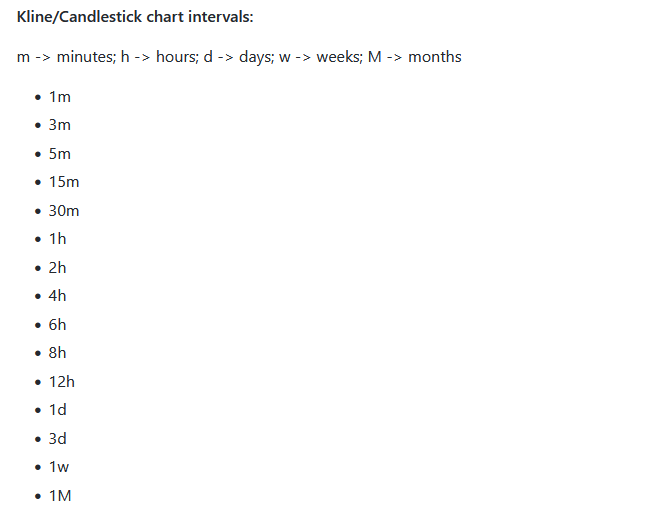

In [34]:
#fetch 1 minute klines for the last day up until now
klines = client.get_historical_klines("BNBBTC", Client.KLINE_INTERVAL_1MINUTE, "1 day ago UTC")

In [35]:
# fetch 30 minute klines for the last month of 2017
klines = client.get_historical_klines("ETHBTC", Client.KLINE_INTERVAL_15MINUTE, "1 Dec, 2017", "1 Jan, 2018")

In [36]:
# fetch 30 minute klines for the last month of 2017
klines = client.get_historical_klines("ETHBTC", Client.KLINE_INTERVAL_30MINUTE, "1 Dec, 2017", "1 Jan, 2018")

In [37]:
#fetch weekly klines since it listed
klines = client.get_historical_klines("NEOBTC", Client.KLINE_INTERVAL_1WEEK, "1 Jan, 2017")

In [38]:
#Solo 1000 valores
klines = client.get_historical_klines('BTCUSDT', '1m','2021-11-10',limit=1000)

In [ ]:
#Resumen 
klines

##### Servidor

In [40]:
#Hora del servidor
time_res = client.get_server_time()
ts = time_res.get('serverTime')
print(ts)

1636904302338


In [41]:
print(datetime.utcfromtimestamp(ts/1000).strftime('%Y-%m-%d %H:%M:%S'))

2021-11-14 15:38:22


##### Giros

Sección pendiente

##### Precio

In [42]:
#Precio actual
price = client.get_symbol_ticker(symbol="ETHUSDT")
price

{'price': '4589.28000000', 'symbol': 'ETHUSDT'}

##### Test